<a href="https://colab.research.google.com/github/starceees/Mapping-algorithm-for-an-AUV-/blob/add-license-1/mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing libraries
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt    
import time

folder1 = r'/content/drive/MyDrive/Projects/RSIP project/saved_images/strip1'
folder2 = r'/content/drive/MyDrive/Projects/RSIP project/saved_images/strip2'
folder3 = r'/content/drive/MyDrive/Projects/RSIP project/saved_images/strip3'
folder4 = r'/content/drive/MyDrive/Projects/RSIP project/saved_images/strip4'
folder5 = r'/content/drive/MyDrive/Projects/RSIP project/saved_images/strip5'
folder6 = r'/content/drive/MyDrive/Projects/RSIP project/saved_images/strip6'

In [19]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0 MB 87 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 30.6 MB 28 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [3]:
#function that captures the images asper the given time limit
def capturing_images(folder, value):
    cap = cv2.VideoCapture(1)
    i = 0 
    while(cap.isOpened()):
        ret, frame = cap.read()
        #cv2.imshow('ViewFinder', frame)
        i += 1
        if(i<value):
            cv2.imwrite( folder + str(i) + '.jpg',frame)
            if(i%20==0):
                print(i)
        else:
            break

In [4]:
#time delay between images 
def delay(seconds):
    start = time.time()
    
    elapsed = 0
    while elapsed < seconds:
        elapsed = time.time() - start
        print(elapsed)
        time.sleep(1)  

In [5]:
#pre processing of images 
def loading_images(folder, images, keypoints, descriptors):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (256,256))  # resizing images to 256*256*3 
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        #(thresh, img) = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        sift = cv2.xfeatures2d.SIFT_create()
        kp, des = sift.detectAndCompute(img,None)  #keypoint detection
        keypoints.append(kp)
        descriptors.append(des)
        img=cv2.drawKeypoints(img,kp,  outImage = None)  # drawing the keypoints
        if img is not None:
            images.append(img)
    #return images

In [6]:
#defining the individual vertical segments of the map 
def individual_strip(images1, descript1, images, descriptors, matches, strip):
    img1 = images1
    des1 = descript1
    j=0
    strip.append(img1)
    for i in range(199):
        img2 = images[i]
        des2 = descriptors[i]
        bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
        matche = bf.match(des1,des2)
        matche = sorted(matche, key = lambda x:x.distance)
        no_of_matches = np.size(matche)
        #print(no_of_matches)
        
        matches.append(no_of_matches)
        if(j%30 == 0):
            strip.append(images[i])
        j += 1
    
    matches.sort()
    print(matches)

In [8]:
images_1 = []
keypoints_1 = []
descriptors_1 = []
strip1 = []
matches1 = []

In [9]:
images_2 = []
keypoints_2 = []
descriptors_2 = []
strip2 = []
matches2 = []

In [10]:
images_3 = []
keypoints_3 = []
descriptors_3 = []
strip3 = []
matches3 = []

In [11]:
images_4 = []
keypoints_4 = []
descriptors_4 = []
strip4 = []
matches4 = []

In [12]:
images_5 = []
keypoints_5 = []
descriptors_5 = []
strip5 = []
matches5 = []

In [13]:
images_6 = []
keypoints_6 = []
descriptors_6 = []
strip6 = []
matches6 = []

In [14]:
#capturing_images(folder1, 201)

In [15]:
loading_images(folder1, images_1, keypoints_1, descriptors_1)

In [16]:
#capturing_images(folder2, 201)

In [17]:
loading_images(folder2, images_2, keypoints_2, descriptors_2)

In [18]:
#capturing_images(folder3, 201)

In [19]:
loading_images(folder3, images_3, keypoints_3, descriptors_3)

In [20]:
#capturing_images(folder4, 201)

In [21]:
loading_images(folder4, images_4, keypoints_4, descriptors_4)

In [22]:
#capturing_images(folder5, 201)

In [23]:
loading_images(folder5, images_5, keypoints_5, descriptors_5)

In [24]:
#capturing_images(folder6, 201)

In [25]:
loading_images(folder6, images_6, keypoints_6, descriptors_6)

In [26]:
individual_strip(images_1[0], descriptors_1[0], images_1, descriptors_1, matches1, strip1)

[10, 11, 11, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 25, 27, 27, 27]


In [27]:
individual_strip(images_2[0], descriptors_2[0], images_2, descriptors_2, matches2, strip2)

[4, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 18, 18, 18, 18, 18, 18, 20, 20, 21, 21, 22, 23, 23, 24, 24, 26, 26, 27, 27, 27, 28, 29, 29, 30, 30, 34, 35, 35, 38, 39, 40, 41, 41, 41, 42, 42, 43, 43, 44, 45, 45, 46, 46, 47, 48, 49, 49, 50, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 53, 53, 54, 54, 54, 55, 56, 56, 57, 57, 57, 58, 58, 59, 59, 59, 60, 60, 60, 60, 60, 61, 62, 62, 62, 63, 63, 63, 63, 64, 64, 64, 64, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 67, 67, 68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 72, 72, 73, 73, 75, 75, 75, 79, 79, 80, 81, 83, 83, 85, 114]


In [28]:
individual_strip(images_3[0], descriptors_3[0], images_3, descriptors_3, matches3, strip3)

[7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 32, 32, 33, 33, 34, 34, 35, 38, 38, 40, 41, 42, 43, 44, 46, 47, 47, 48, 48, 49, 51, 51, 52, 56, 58, 59, 60, 60, 60, 61, 62, 62, 62, 62, 63, 63, 64, 64, 65, 65, 66, 67, 67, 67, 68, 68, 68, 70, 71, 77, 78, 116]


In [29]:
individual_strip(images_4[38], descriptors_4[38], images_4, descriptors_4, matches4, strip4)

[5, 5, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 18, 18, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 23, 23, 24, 24, 26, 26, 28, 28, 29, 30, 30, 30, 31, 32, 32, 33, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 39, 39, 39, 39, 40, 41, 42, 42, 42, 42, 42, 42, 43, 43, 43, 44, 45, 46, 47, 48, 49, 49, 55, 61, 67, 77, 90, 93, 95, 105, 106, 106, 106, 106, 106, 107, 108, 109, 109, 109, 109, 109, 110, 111, 112, 112, 112, 113, 114, 114, 114, 114, 114, 114, 115, 115, 115, 115, 115, 116, 116, 116, 116, 116, 116, 116, 116, 117, 117, 117, 117, 117, 117, 118, 118, 118, 118, 118, 118, 118, 118, 118, 123, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 126, 126, 126, 126, 127, 128, 130, 131, 133, 175, 175, 175, 175]


In [30]:
individual_strip(images_5[0], descriptors_5[0], images_5, descriptors_5, matches5, strip5)

[5, 6, 7, 7, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 17, 17, 17, 17, 18, 18, 20, 20, 22, 23, 23, 23, 24, 24, 25, 25, 27, 27, 29, 31, 31, 31, 32, 32, 32, 33, 33, 34, 34, 34, 35, 35, 35, 35, 35, 36, 37, 37, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 41, 41, 42, 42, 42, 42, 43, 43, 44, 44, 45, 45, 45, 45, 45, 46, 46, 46, 46, 47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 50, 50, 51, 51, 51, 53, 53, 53, 53, 54, 54, 55, 56, 57, 58, 59, 60, 63, 63, 65, 66, 78, 79, 80, 80, 81, 82, 84, 84, 84, 84, 84, 84, 85, 85, 85, 86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87, 88, 89, 90, 90, 91, 91, 91, 92, 92, 92, 92, 93, 93, 93, 94, 94, 94, 94, 94, 94, 94, 95, 95, 95, 96, 96, 97, 98, 102, 105, 106, 151]


In [31]:
individual_strip(images_6[0], descriptors_6[0], images_6, descriptors_6, matches6, strip6)

[8, 9, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 15, 17, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 22, 22, 22, 22, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 27, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38, 39, 39, 39, 39, 39, 39, 39, 40, 40, 41, 41, 41, 41, 41, 41, 43, 43, 45, 45, 45, 46, 46, 48, 49, 49, 50, 52, 53, 53, 53, 54, 54, 54, 54, 54, 55, 55, 55, 56, 56, 56, 56, 56, 57, 57, 57, 58, 58, 58, 58, 58, 59, 59, 59]


In [32]:
final_img_1 = cv2.vconcat(strip1)

In [33]:
final_img_2 = cv2.vconcat(strip2)

In [34]:
final_img_3 = cv2.vconcat(strip3)

In [35]:
final_img_4 = cv2.vconcat(strip4)

In [36]:
final_img_5 = cv2.vconcat(strip5)

In [37]:
final_img_6 = cv2.vconcat(strip6)

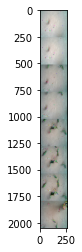

In [38]:
plt.imshow( final_img_1)
plt.show()

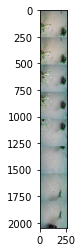

In [39]:
plt.imshow(final_img_2)
plt.show()

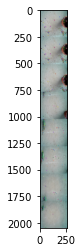

In [40]:
plt.imshow( final_img_3)
plt.show()

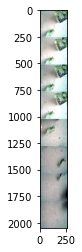

In [41]:
plt.imshow( final_img_4)
plt.show()

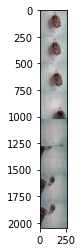

In [42]:
plt.imshow( final_img_5)
plt.show()

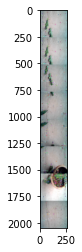

In [43]:
plt.imshow( final_img_6)
plt.show()

In [44]:
maps =[]
maps.append(final_img_1)
maps.append(final_img_2)
maps.append(final_img_3)
maps.append(final_img_4)
maps.append(final_img_5)
maps.append(final_img_6)

In [45]:
final_img = cv2.hconcat(maps)

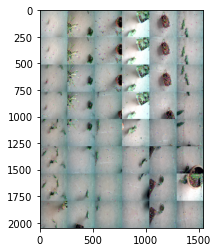

In [46]:
plt.imshow( final_img)

plt.show()

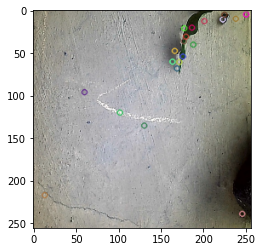

In [47]:
images_4[150] = cv2.cvtColor(images_4[150],cv2.COLOR_BGR2RGB )
plt.imshow(images_4[150])
plt.show()

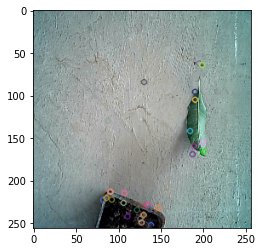

In [48]:
plt.imshow(images_2[180])
plt.show()

In [49]:
img1 = images_1[40]
des1 = descriptors_1[40]
img2 = images_1[150]
des2 = descriptors_1[150]
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matche = bf.match(des1,des2)
matche = sorted(matche, key = lambda x:x.distance)
no_of_matches = np.size(matche)


In [ ]:
print(matche)

[<DMatch 0000028DC0D96470>, <DMatch 0000028DC0D96850>, <DMatch 0000028DC0D96890>, <DMatch 0000028DBFCF0270>, <DMatch 0000028DC0D966D0>, <DMatch 0000028DC0D96390>, <DMatch 0000028DC0D96350>, <DMatch 0000028DC0D96A10>, <DMatch 0000028DBFD14B30>, <DMatch 0000028DC0D96790>, <DMatch 0000028DC0D96310>, <DMatch 0000028DBFD14AD0>, <DMatch 0000028DBFD14B90>]


In [ ]:
print(no_of_matches)

13


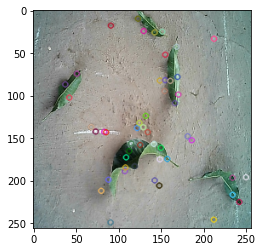

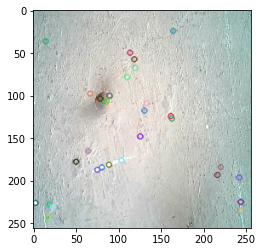

In [ ]:

plt.imshow(images_1[40])
plt.show()

plt.imshow(images_1[150])
plt.show()

In [ ]:
print(matche[1])

<DMatch 0000028DC0D96850>


In [ ]:
np.shape(images_1)

(151, 256, 256, 3)

In [ ]:
img = []

In [ ]:

for i in range(50):
    image = images_2[i+30]
    img.append(image)
    

In [ ]:
ima = cv2.vconcat(img)


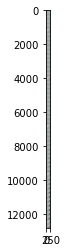

In [ ]:
plt.imshow(ima)
plt.show()